In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./dataset/quora_questions.csv')

In [19]:
df.head(10)

,Question,doclen
35101,"Like everyone else (here in U.S), I work with ...",125
401274,Hello dear's people. i have a fictief research...,80
33209,A lady buys goods worth 200 bucks from a shop ...,77
402355,I'm a 34 years old married to a woman. I had a...,73
355197,I am turning 25 in about a month and am curren...,73
331182,My employer has told me that we can not accept...,72
20875,I have been using my girlfriend for a sexual r...,71
86145,"You have 100 coins laying flat on a table, eac...",68
147457,I broke up with him. I love him so much but we...,68
325314,I broke up with him. I love him so much but we...,68


## perform The Following
 1.spelling correction

 2.standard case,

 3.perform removal of non english words like corss language characters

In [4]:
df['doclen']=df['Question'].apply(lambda x: len(x.split()))

In [5]:
df.sort_values(by='doclen',ascending=False,inplace=True)

In [6]:
df.describe()

,doclen
count,404289.000000
mean,10.942234
std,5.428808
min,1.000000
25%,7.000000
50%,10.000000
75%,13.000000
max,125.000000


In [7]:
filter1=df['doclen']>=20

In [8]:
df=df[filter1]

In [9]:
# df.to_csv('quora_questions_filtered.csv',index=False)

In [10]:
df.describe()

,doclen
count,30735.000000
mean,24.733594
std,5.379956
min,20.000000
25%,21.000000
50%,23.000000
75%,27.000000
max,125.000000


In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy
import re
import matplotlib.pyplot as plt
from collections import Counter

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /home/adminserv/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adminserv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure punkt is available
nltk.download('punkt_tab') 

# Test tokenization
text = "This is a test sentence."
tokens = word_tokenize(text)
print(tokens)  # Should output: ['This', 'is', 'a', 'test', 'sentence', '.']


['This', 'is', 'a', 'test', 'sentence', '.']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/adminserv/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [13]:
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test sentence."))

['This', 'is', 'a', 'test', 'sentence', '.']


In [14]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]

    words = [nlp(word)[0].lemma_ for word in words]
    print(words)
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    normalized_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in corrected_words]
    return ' '.join(normalized_words)


def visualize_word_distribution(original, preprocessed):
    original_words = Counter(word_tokenize(' '.join(original)))
    preprocessed_words = Counter(word_tokenize(' '.join(preprocessed)))

    original_counts = dict(original_words.most_common(10))
    preprocessed_counts = dict(preprocessed_words.most_common(10))

    df_counts = pd.DataFrame({
        'Original': original_counts,
        'Preprocessed': preprocessed_counts
    }).fillna(0)

    df_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Top 10 Words Before and After Preprocessing')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
df['Question']

35101     Like everyone else (here in U.S), I work with ...
401274    Hello dear's people. i have a fictief research...
33209     A lady buys goods worth 200 bucks from a shop ...
402355    I'm a 34 years old married to a woman. I had a...
355197    I am turning 25 in about a month and am curren...
                                ...                        
67238     Gmail: What should I do after my Gmail account...
226119    Can Trump’s accusers still sue? Is there a sta...
226171    Do you think that Modern Standard Chinese reli...
226075    Itachi uchiha killed his mother who was innoce...
53008     What are the most common traffic convictions i...
Name: Question, Length: 30735, dtype: object

In [16]:
documents = list(df['Question'])

In [18]:
documents=[text.lower() for text in documents]
print("len=",len(documents))
newDocuments=[]
for idx,text in enumerate(documents):
    print("idx=",idx)
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [nlp(word)[0].lemma_ for word in words]
    corrected_words = [str(TextBlob(word).correct()) for word in words]
    normalized_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in corrected_words]
    newDocuments.append(' '.join(normalized_words))

len= 30735
idx= 0
idx= 1
idx= 2
idx= 3
idx= 4
idx= 5
idx= 6
idx= 7
idx= 8
idx= 9
idx= 10
idx= 11
idx= 12
idx= 13
idx= 14
idx= 15
idx= 16
idx= 17
idx= 18
idx= 19
idx= 20
idx= 21
idx= 22
idx= 23
idx= 24
idx= 25
idx= 26
idx= 27
idx= 28
idx= 29
idx= 30
idx= 31
idx= 32
idx= 33
idx= 34
idx= 35
idx= 36
idx= 37
idx= 38
idx= 39
idx= 40
idx= 41
idx= 42
idx= 43
idx= 44
idx= 45
idx= 46
idx= 47
idx= 48
idx= 49
idx= 50
idx= 51
idx= 52
idx= 53
idx= 54
idx= 55
idx= 56
idx= 57
idx= 58
idx= 59
idx= 60
idx= 61
idx= 62
idx= 63
idx= 64
idx= 65
idx= 66
idx= 67
idx= 68
idx= 69
idx= 70
idx= 71
idx= 72
idx= 73
idx= 74
idx= 75
idx= 76
idx= 77
idx= 78
idx= 79
idx= 80
idx= 81
idx= 82
idx= 83
idx= 84
idx= 85
idx= 86
idx= 87
idx= 88
idx= 89
idx= 90
idx= 91
idx= 92
idx= 93
idx= 94
idx= 95
idx= 96
idx= 97
idx= 98
idx= 99
idx= 100
idx= 101
idx= 102
idx= 103
idx= 104
idx= 105
idx= 106
idx= 107
idx= 108
idx= 109
idx= 110
idx= 111
idx= 112
idx= 113
idx= 114
idx= 115
idx= 116
idx= 117
idx= 118
idx= 119
idx= 120
idx= 121
i

In [22]:
df['preprocessed']=newDocuments

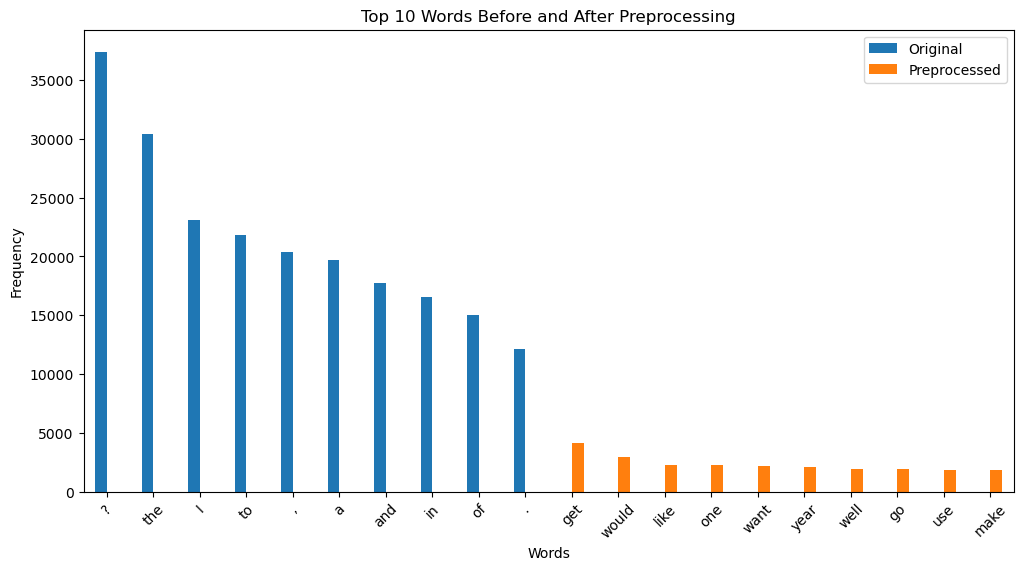

In [23]:

# Visualize word distribution
visualize_word_distribution(df['Question'], df['preprocessed'])

In [24]:
df.to_csv('./preprocessed.csv')